In [1]:
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data_path = '../input/Teste4/'
geo_model = gp.create_model('SyntheitcBasinTeste4')

In [3]:
gp.init_data(geo_model,
             extent=[0, 2000, 0, 2000, 0, 2000],
             resolution=[50, 50, 50],
             path_i=data_path + "funcionou/7/surface_points.csv",
             path_o=data_path + "funcionou/7/orientations_points.csv")

Active grids: ['regular']


SyntheitcBasinTeste4  2023-03-09 10:38

In [4]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Shale,Default series,1,#015482,1
1,Sandstone_1,Default series,2,#9f0052,2
2,Siltstone,Default series,3,#ffbe00,3
3,Sandstone_2,Default series,4,#728f02,4
4,Main_Fault,Default series,5,#443988,5
5,basement,Basement,1,#ff3f20,6


In [5]:
gp.map_stack_to_surfaces(geo_model,
                         {"Fault_Series": 'Main_Fault',
                          "Strat_Series": ('Shale', 'Sandstone_1',
                                           'Siltstone', 'Sandstone_2', 'basement')},
                         remove_unused_series=True)

,surface,series,order_surfaces,color,id
4,Main_Fault,Fault_Series,1,#443988,1
0,Shale,Strat_Series,1,#015482,2
1,Sandstone_1,Strat_Series,2,#9f0052,3
2,Siltstone,Strat_Series,3,#ffbe00,4
3,Sandstone_2,Strat_Series,4,#728f02,5
5,basement,Strat_Series,5,#ff3f20,6


In [6]:
geo_model.grid

Grid Object. Values: 
array([[  20.,   20.,   20.],
       [  20.,   20.,   60.],
       [  20.,   20.,  100.],
       ...,
       [1980., 1980., 1900.],
       [1980., 1980., 1940.],
       [1980., 1980., 1980.]])

C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


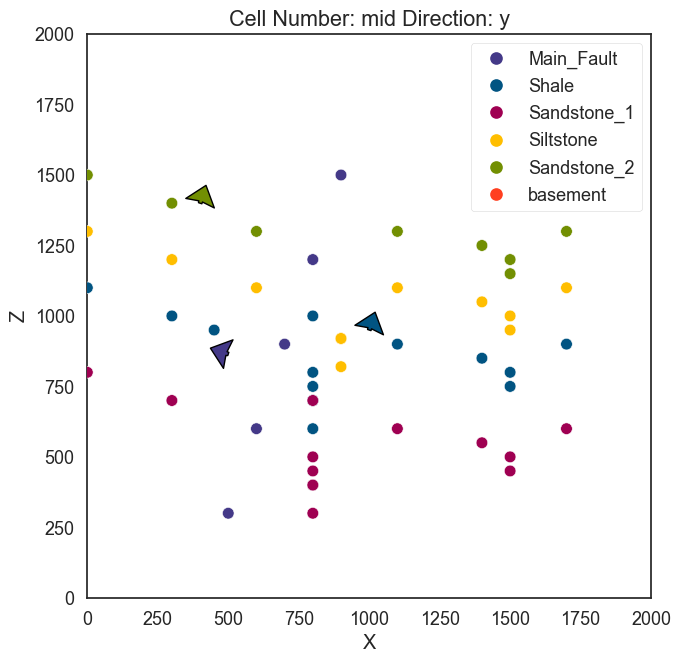

In [7]:
plot = gp.plot_2d(geo_model, show_lith=False, show_boundaries=False)
plt.show()

In [8]:
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\pyvista\utilities\helpers.py:508: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  'Points is not a float type. This can cause issues when '


In [9]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                         values
range              3464.101615
$C_o$            285714.285714
drift equations         [3, 3]


In [10]:
sol = gp.compute_model(geo_model)

In [11]:
sol


Lithology ids 
  [1. 1. 1. ... 2. 2. 2.] 

C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


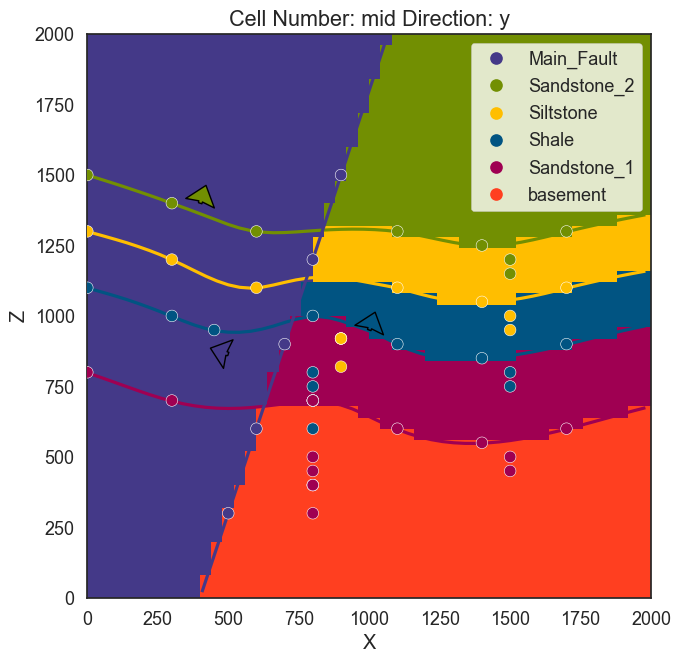

In [12]:
gp.plot_2d(geo_model, show_data=True)
plt.show()

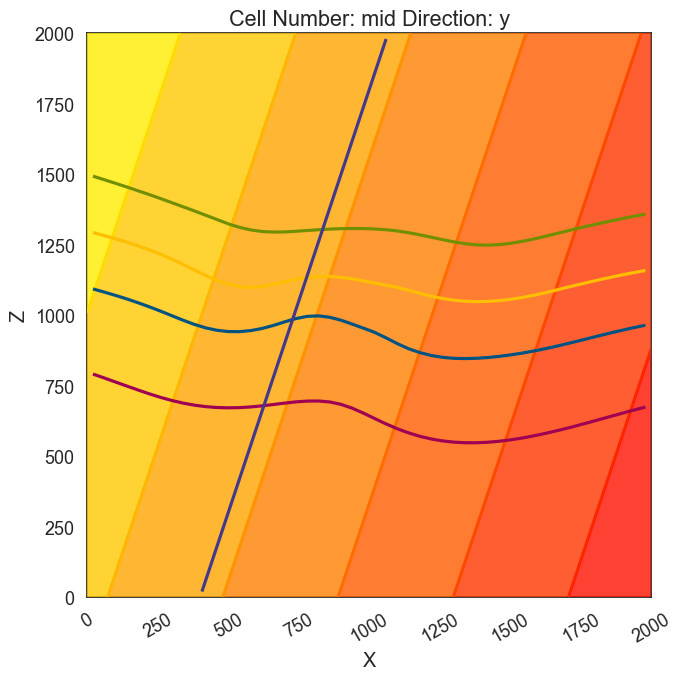

In [13]:
gp.plot_2d(geo_model, show_data=False, show_scalar=True, show_lith=False)
plt.show()

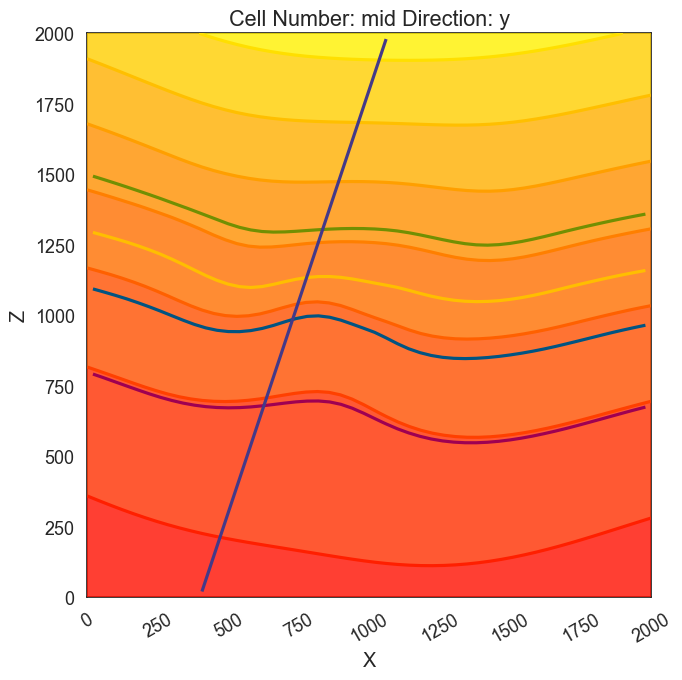

In [14]:
gp.plot_2d(geo_model, series_n=1, show_data=False, show_scalar=True, show_lith=False)
plt.show()


In [15]:
geo_model.solutions.scalar_field_at_surface_points

array([[-0.55768591,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.67734855,  0.59290532,  0.74468584,  0.82414801]])

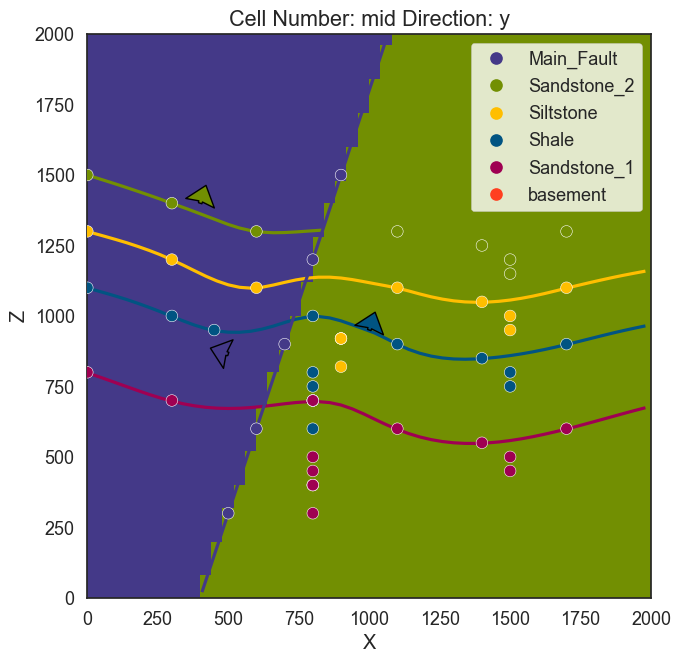

In [16]:
gp.plot_2d(geo_model, show_block=True, show_lith=False)
plt.show()

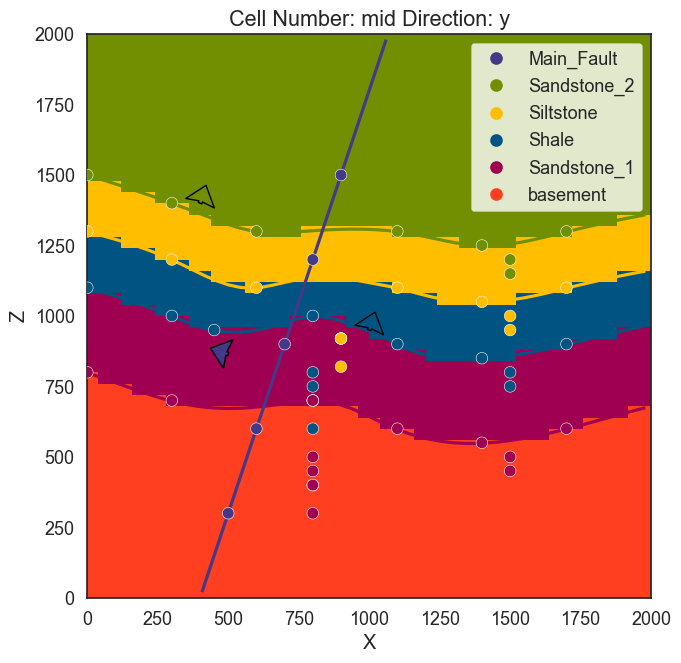

In [17]:
gp.plot_2d(geo_model, series_n=1, show_block=True, show_lith=False)
plt.show()

In [18]:
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\pyvista\plotting\tools.py:624: PyVistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  PyVistaDeprecationWarning,
C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\pyvista\utilities\helpers.py:508: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  'Points is not a float type. This can cause issues when '
